In [ ]:
import time
import random
import datetime
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout, MaxPool2D,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add
    )

# LOAD LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow import keras
# How to check if Keras is using GPU?

from keras import backend as K

# K.tensorflow_backend._get_available_gpus()

train = pd.read_csv('./drive/My Drive/dacon/emnist/train.csv')
test  = pd.read_csv('./drive/My Drive/dacon/emnist/test.csv')
submission = pd.read_csv('./drive/My Drive/dacon/emnist/submission.csv')

In [ ]:
train.head()

,id,digit,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,4,4,3,0,4,3,3,3,4,4,0,0,1,1,3,4,0,4,2,0,4,0,1,3,1,0,4,1,1,3,...,4,3,4,1,3,0,0,1,3,3,3,0,3,2,2,1,0,1,0,0,3,0,0,4,2,0,3,4,1,1,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,1,4,2,0,3,4,0,0,2,3,4,0,3,4,3,0,2,2,1,4,2,3,3,4,1,2,4,2,0,3,...,4,2,3,0,0,0,0,4,3,2,2,4,2,1,1,1,3,3,1,2,4,4,4,2,2,4,4,0,4,2,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,0,2,1,3,2,2,2,4,1,1,4,1,0,1,3,4,2,2,2,4,1,1,2,0,3,0,2,3,4,0,...,3,0,4,0,3,0,2,0,1,4,2,3,4,4,4,0,2,0,4,4,1,3,0,3,2,0,2,3,0,2,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,3,4,3,1,0,3,2,2,0,3,4,1,0,4,1,2,2,3,2,2,0,2,0,3,0,3,2,4,0,0,...,0,3,0,1,4,1,3,1,2,1,1,1,2,2,2,4,3,4,3,0,4,1,2,4,1,4,0,1,0,4,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,4,2,4,2,1,4,1,1,4,4,0,2,3,4,4,3,3,3,3,4,1,0,3,0,3,0,0,0,1,1,...,2,1,3,2,1,4,2,3,2,2,1,0,4,2,2,1,2,1,0,3,2,2,2,2,1,4,2,1,2,1,4,4,3,2,1,3,4,3,1,2


In [ ]:
test.head()

,id,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,0,0,1,0,1,3,4,4,0,0,2,4,4,1,3,3,2,2,4,1,0,1,2,2,1,2,2,1,4,0,...,1,3,1,1,3,3,4,1,3,1,2,4,1,2,0,3,1,2,4,0,2,1,2,4,1,1,3,2,1,0,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,2,1,0,3,0,1,1,4,1,2,0,2,2,0,4,3,4,0,2,4,4,2,1,2,4,0,4,2,0,2,...,3,4,2,6,2,2,0,1,2,4,1,1,3,3,2,3,4,2,2,4,3,1,3,3,3,1,3,4,4,2,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,2,1,2,0,1,0,3,0,1,4,3,0,0,3,0,4,1,0,3,2,0,4,1,2,0,0,1,3,0,2,...,0,4,4,3,4,1,4,2,3,4,1,2,0,2,2,3,3,1,1,4,1,2,4,0,0,0,0,2,3,2,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,0,2,3,2,3,4,4,4,0,1,4,2,2,0,1,4,3,1,3,0,2,3,2,4,3,1,1,4,0,0,...,0,4,1,1,2,3,2,3,3,0,0,1,3,3,0,2,0,0,2,3,2,2,3,1,1,2,4,0,1,2,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,1,1,4,3,4,1,2,1,4,3,3,4,0,4,4,2,0,0,0,0,3,4,0,1,4,2,2,2,1,4,...,4,1,3,2,1,2,1,4,4,1,2,3,2,4,2,1,4,3,4,3,0,1,0,1,1,2,1,1,0,2,4,3,1,4,0,2,1,2,3,4


In [ ]:

y_train1 = to_categorical(train['digit'].values)

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(
    train, y_train1, test_size = 0.1)


In [ ]:
def tmp_scaler(x):
    return  (x.iloc[:,3:]/255.).values.reshape(-1, 28, 28,1)

In [ ]:
X_train2 = tmp_scaler(X_train)
X_val2 = tmp_scaler(X_val)
X_train_letter = pd.get_dummies(X_train.letter)
X_val_letter = pd.get_dummies(X_val.letter)


In [ ]:
X_val2.shape

(205, 28, 28, 1)

In [ ]:
np.argmax(y_train[2])

5

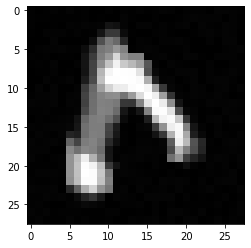

In [ ]:
plt.imshow(X_train2[2].reshape(28,28),cmap='gray') 

In [ ]:

from google.colab.patches import cv2_imshow

69 4


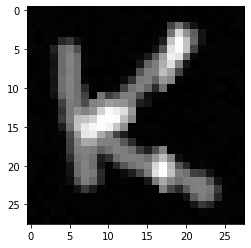

In [ ]:
import random

i = random.randint(0,100)
print(i,np.argmax( y_train[i]))
plt.imshow(X_train2[i].reshape(28,28),cmap='gray')

In [ ]:
X_train2[0][0]

array([[0.00392157],
       [0.01568627],
       [0.00392157],
       [0.00392157],
       [0.00392157],
       [0.00392157],
       [0.00392157],
       [0.01568627],
       [0.01176471],
       [0.00392157],
       [0.01176471],
       [0.01568627],
       [0.01176471],
       [0.01176471],
       [0.00392157],
       [0.00392157],
       [0.00392157],
       [0.01568627],
       [0.00784314],
       [0.00784314],
       [0.01568627],
       [0.00392157],
       [0.00392157],
       [0.00784314],
       [0.00392157],
       [0.        ],
       [0.00784314],
       [0.00784314]])

In [ ]:
X_train2.shape

(1843, 28, 28, 1)

In [ ]:
X_val2.shape

(205, 28, 28, 1)

In [ ]:
X_train_letter.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z
1667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1155,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1438,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1646,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_letter.shape

(1843, 26)

In [ ]:
def create_tmp_model():

    input_digits = keras.layers.Input(shape=(28,28,1))
    conv1 = keras.layers.Conv2D(32, kernel_size = 3, padding="same",activation='relu',name="conv1")(input_digits)
    conv1_1 = keras.layers.Conv2D(32, kernel_size = 3, padding="same", activation='relu',name="conv1_1")(conv1)
    conv2 = keras.layers.Conv2D(32, kernel_size = 3, padding="same", activation='relu',name="conv2")(conv1_1)

    batchnorm1 = keras.layers.BatchNormalization()(conv2)
    concat1 = keras.layers.Concatenate()([conv1,batchnorm1])

    conv3 = keras.layers.Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu',name="conv3")(concat1)
    drop1 = keras.layers.Dropout(0.4)(conv3)

    conv4 = keras.layers.Conv2D(64, kernel_size = 3, padding="same",activation='relu',name="conv4")(drop1)
    conv4_1 = keras.layers.Conv2D(64, kernel_size = 3, padding="same", activation='relu',name="conv4_1")(conv4)    
    conv5 = keras.layers.Conv2D(64, kernel_size = 3, padding="same",activation='relu',name="conv5")(conv4_1)

    batchnorm2 = keras.layers.BatchNormalization()(conv5)
    concat2 = keras.layers.Concatenate()([conv4,batchnorm2])

    conv5_1 = keras.layers.Conv2D(64, kernel_size = 3, padding="same",activation='relu',name="conv5_1")(concat2)
    conv5_2 = keras.layers.Conv2D(64, kernel_size = 3, padding="same",activation='relu',name="conv5_2")(conv5_1)
    conv5_3 = keras.layers.Conv2D(64, kernel_size = 3, padding="same",activation='relu',name="conv5_3")(conv5_2)

    concat2_1 = keras.layers.Concatenate()([conv5_1,conv5_3])
    batchnorm4 = keras.layers.BatchNormalization()(concat2_1)

    conv6 = keras.layers.Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu',name="conv6")(batchnorm4)
    drop2 = keras.layers.Dropout(0.4)(conv6)

    conv7 = keras.layers.Conv2D(256, kernel_size = 4, activation='relu',name="conv7")(drop2)
    conv7_1 = keras.layers.Conv2D(256, kernel_size = 4,padding='same', activation='relu',name="conv7_1")(conv7)
    conv8 = keras.layers.Conv2D(512, kernel_size = 4, activation='relu',name="conv8")(conv7_1)

    batchnorm3 = keras.layers.BatchNormalization()(conv8)
    flatten = keras.layers.Flatten()(batchnorm3)

    ''' **********************************************************************************************************'''
    
    input_letter =keras.layers.Input(shape=[26])    

    concat = keras.layers.concatenate([input_letter,flatten])

    dense1 = keras.layers.Dense(400,activation='relu')(concat)
    dense2 = keras.layers.Dense(400,activation='relu')(dense1)
    output = keras.layers.Dense(10,activation='softmax',name="output")(dense2)

    model = keras.Model(inputs=[input_digits,input_letter],outputs=[output])


    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


    return model

In [ ]:
def create_901_model():

    input_digits = keras.layers.Input(shape=(28,28,1))
    conv1 = keras.layers.Conv2D(32, kernel_size = 3, padding="same",activation='relu',name="conv1")(input_digits)
    conv1_1 = keras.layers.Conv2D(32, kernel_size = 3, padding="same", activation='relu',name="conv1_1")(conv1)
    conv2 = keras.layers.Conv2D(32, kernel_size = 3, padding="same", activation='relu',name="conv2")(conv1_1)

    concat1 = keras.layers.Concatenate()([conv1,conv2])

    conv3 = keras.layers.Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu',name="conv3")(concat1)
    drop1 = keras.layers.Dropout(0.4)(conv3)

    conv4 = keras.layers.Conv2D(64, kernel_size = 3, padding="same",activation='relu',name="conv4")(drop1)
    conv4_1 = keras.layers.Conv2D(32, kernel_size = 3, padding="same", activation='relu',name="conv4_1")(conv4)    
    conv5 = keras.layers.Conv2D(64, kernel_size = 3, padding="same",activation='relu',name="conv5")(conv4_1)

    concat2 = keras.layers.Concatenate()([conv4,conv5])


    conv6 = keras.layers.Conv2D(64, kernel_size = 5, strides=2, padding='same', 
                                activation='relu',name="conv6")(concat2)
    drop2 = keras.layers.Dropout(0.4)(conv6)

    conv7 = keras.layers.Conv2D(256, kernel_size = 4, activation='relu',name="conv7")(drop2)
    conv8 = keras.layers.Conv2D(256, kernel_size = 4, activation='relu',name="conv8")(conv7)

    flatten = keras.layers.Flatten()(conv8)

    ''' **********************************************************************************************************'''
    
    input_letter =keras.layers.Input(shape=[26])    

    concat = keras.layers.concatenate([input_letter,flatten])

    dense1 = keras.layers.Dense(200,activation='relu')(concat)
    # dense1 = keras.layers.Dense(200,activation='relu')(flatten)    dense2 = keras.layers.Dense(200,activation='relu')(dense1)
    output = keras.layers.Dense(10,activation='softmax',name="output")(dense2)

    model = keras.Model(inputs=[input_digits,input_letter],outputs=[output])


    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


    return model

In [ ]:
modeljson= '''
{"class_name": "Functional", "config": {"name": "functional_34", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_35"}, "name": "input_35", "inbound_nodes": []}, {"class_name": "Conv2D", "config": {"name": "conv1", "trainable": true, "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "conv1", "inbound_nodes": [[["input_35", 0, 0, {}]]]}, {"class_name": "Conv2D", "config": {"name": "conv1_1", "trainable": true, "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "conv1_1", "inbound_nodes": [[["conv1", 0, 0, {}]]]}, {"class_name": "Conv2D", "config": {"name": "conv2", "trainable": true, "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "conv2", "inbound_nodes": [[["conv1_1", 0, 0, {}]]]}, {"class_name": "Concatenate", "config": {"name": "concatenate_27", "trainable": true, "dtype": "float32", "axis": -1}, "name": "concatenate_27", "inbound_nodes": [[["conv1", 0, 0, {}], ["conv2", 0, 0, {}]]]}, {"class_name": "Conv2D", "config": {"name": "conv3", "trainable": true, "dtype": "float32", "filters": 32, "kernel_size": [5, 5], "strides": [2, 2], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "conv3", "inbound_nodes": [[["concatenate_27", 0, 0, {}]]]}, {"class_name": "Dropout", "config": {"name": "dropout_34", "trainable": true, "dtype": "float32", "rate": 0.4, "noise_shape": null, "seed": null}, "name": "dropout_34", "inbound_nodes": [[["conv3", 0, 0, {}]]]}, {"class_name": "Conv2D", "config": {"name": "conv4", "trainable": true, "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "conv4", "inbound_nodes": [[["dropout_34", 0, 0, {}]]]}, {"class_name": "Conv2D", "config": {"name": "conv4_1", "trainable": true, "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "conv4_1", "inbound_nodes": [[["conv4", 0, 0, {}]]]}, {"class_name": "Conv2D", "config": {"name": "conv5", "trainable": true, "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "conv5", "inbound_nodes": [[["conv4_1", 0, 0, {}]]]}, {"class_name": "Concatenate", "config": {"name": "concatenate_28", "trainable": true, "dtype": "float32", "axis": -1}, "name": "concatenate_28", "inbound_nodes": [[["conv4", 0, 0, {}], ["conv5", 0, 0, {}]]]}, {"class_name": "Conv2D", "config": {"name": "conv6", "trainable": true, "dtype": "float32", "filters": 64, "kernel_size": [5, 5], "strides": [2, 2], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "conv6", "inbound_nodes": [[["concatenate_28", 0, 0, {}]]]}, {"class_name": "Dropout", "config": {"name": "dropout_35", "trainable": true, "dtype": "float32", "rate": 0.4, "noise_shape": null, "seed": null}, "name": "dropout_35", "inbound_nodes": [[["conv6", 0, 0, {}]]]}, {"class_name": "Conv2D", "config": {"name": "conv7", "trainable": true, "dtype": "float32", "filters": 256, "kernel_size": [4, 4], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "conv7", "inbound_nodes": [[["dropout_35", 0, 0, {}]]]}, {"class_name": "Conv2D", "config": {"name": "conv8", "trainable": true, "dtype": "float32", "filters": 256, "kernel_size": [4, 4], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "conv8", "inbound_nodes": [[["conv7", 0, 0, {}]]]}, {"class_name": "InputLayer", "config": {"batch_input_shape": [null, 26], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_36"}, "name": "input_36", "inbound_nodes": []}, {"class_name": "Flatten", "config": {"name": "flatten_17", "trainable": true, "dtype": "float32", "data_format": "channels_last"}, "name": "flatten_17", "inbound_nodes": [[["conv8", 0, 0, {}]]]}, {"class_name": "Concatenate", "config": {"name": "concatenate_29", "trainable": true, "dtype": "float32", "axis": -1}, "name": "concatenate_29", "inbound_nodes": [[["input_36", 0, 0, {}], ["flatten_17", 0, 0, {}]]]}, {"class_name": "Dense", "config": {"name": "dense_34", "trainable": true, "dtype": "float32", "units": 200, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "dense_34", "inbound_nodes": [[["concatenate_29", 0, 0, {}]]]}, {"class_name": "Dense", "config": {"name": "dense_35", "trainable": true, "dtype": "float32", "units": 200, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "dense_35", "inbound_nodes": [[["dense_34", 0, 0, {}]]]}, {"class_name": "Dense", "config": {"name": "output", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "output", "inbound_nodes": [[["dense_35", 0, 0, {}]]]}], "input_layers": [["input_35", 0, 0], ["input_36", 0, 0]], "output_layers": [["output", 0, 0]]}, "keras_version": "2.4.0", "backend": "tensorflow"}
'''

In [ ]:
model = keras.models.model_from_json(modeljson)

In [ ]:
# model = create_901_model()
model.summary()

Model: "functional_34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_35 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 28, 28, 32)   320         input_35[0][0]                   
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 28, 28, 32)   9248        conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 28, 28, 32)   9248        conv1_1[0][0]                    
______________________________________________________________________________________

In [ ]:
model.load_weights('/content/params_829_901.h5')

In [ ]:

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.98 ** x)


In [ ]:
epochs = 200
patience = 100

In [ ]:

history = model.fit(
    # datagen(X_train2,y_train2,)
    (X_train2,X_train_letter), y_train,
    # X_train2, y_train,
    epochs=epochs, 
    steps_per_epoch=X_train2.shape[0]//32,
    validation_data=((X_val2,X_val_letter), y_val),
    # validation_data=(X_val2, y_val),
    callbacks=[annealer,keras.callbacks.EarlyStopping(patience=patience,restore_best_weights=True,monitor='val_accuracy',mode='max')]
    # verbose=0
)

Epoch 1/200
57/57 [==============================] - 1s 16ms/step - loss: 1.9948 - accuracy: 0.2868 - val_loss: 2.6670 - val_accuracy: 0.1073
Epoch 2/200
57/57 [==============================] - 1s 10ms/step - loss: 1.3898 - accuracy: 0.5107 - val_loss: 2.1973 - val_accuracy: 0.1561
Epoch 3/200
57/57 [==============================] - 1s 10ms/step - loss: 0.9957 - accuracy: 0.6626 - val_loss: 2.8717 - val_accuracy: 0.1317
Epoch 4/200
57/57 [==============================] - 1s 10ms/step - loss: 0.7182 - accuracy: 0.7628 - val_loss: 5.2458 - val_accuracy: 0.1073
Epoch 5/200
57/57 [==============================] - 1s 10ms/step - loss: 0.5994 - accuracy: 0.7862 - val_loss: 4.3239 - val_accuracy: 0.1122
Epoch 6/200
57/57 [==============================] - 1s 11ms/step - loss: 0.5559 - accuracy: 0.8129 - val_loss: 3.0326 - val_accuracy: 0.2244
Epoch 7/200
57/57 [==============================] - 1s 10ms/step - loss: 0.4420 - accuracy: 0.8491 - val_loss: 3.5471 - val_accuracy: 0.2146
Epoch 

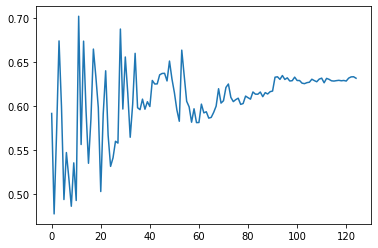

In [ ]:
plt.plot(history.history["val_loss"][12:])

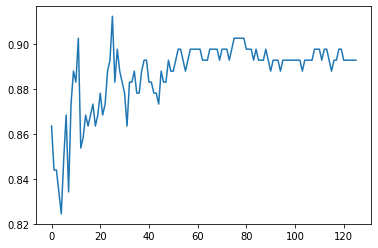

In [ ]:
plt.plot(history.history['val_accuracy'][11:])

In [ ]:
print("loss:\t\t{1}\naccuracy:\t{0}\nval_loss:\t{2}\nval_accuracy:\t{3}".format(history.history["accuracy"][16],history.history["loss"][16],
                                                                   history.history['val_loss'][16],history.history['val_accuracy'][16]))

loss:		0.07491633296012878
accuracy:	0.9765458703041077
val_loss:	0.5510939359664917
val_accuracy:	0.8731707334518433


In [ ]:
model.evaluate((X_val2,X_val_letter), y_val)

7/7 [==============================] - 0s 5ms/step - loss: 0.0085 - accuracy: 0.9951


[0.008545320481061935, 0.995121955871582]

In [ ]:
# 아마 성능 향상의 가장 큰 요인, 데이터 증강
# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
dropout_14 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 4, 4, 64)         

In [ ]:
X_train2.shape

(1843, 28, 28, 1)

In [ ]:
# Parameter 및 모델 구조 저장
model.save_weights(f'/content/drive/My Drive/dacon결과/renet/dacon.h5')
    
model_json = model.to_json()
with open(f"model_829_tmp.json", "w") as json_file : 
    json_file.write(model_json)
    

In [ ]:
test.head()

,id,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,0,0,1,0,1,3,4,4,0,0,2,4,4,1,3,3,2,2,4,1,0,1,2,2,1,2,2,1,4,0,...,1,3,1,1,3,3,4,1,3,1,2,4,1,2,0,3,1,2,4,0,2,1,2,4,1,1,3,2,1,0,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,2,1,0,3,0,1,1,4,1,2,0,2,2,0,4,3,4,0,2,4,4,2,1,2,4,0,4,2,0,2,...,3,4,2,6,2,2,0,1,2,4,1,1,3,3,2,3,4,2,2,4,3,1,3,3,3,1,3,4,4,2,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,2,1,2,0,1,0,3,0,1,4,3,0,0,3,0,4,1,0,3,2,0,4,1,2,0,0,1,3,0,2,...,0,4,4,3,4,1,4,2,3,4,1,2,0,2,2,3,3,1,1,4,1,2,4,0,0,0,0,2,3,2,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,0,2,3,2,3,4,4,4,0,1,4,2,2,0,1,4,3,1,3,0,2,3,2,4,3,1,1,4,0,0,...,0,4,1,1,2,3,2,3,3,0,0,1,3,3,0,2,0,0,2,3,2,2,3,1,1,2,4,0,1,2,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,1,1,4,3,4,1,2,1,4,3,3,4,0,4,4,2,0,0,0,0,3,4,0,1,4,2,2,2,1,4,...,4,1,3,2,1,2,1,4,4,1,2,3,2,4,2,1,4,3,4,3,0,1,0,1,1,2,1,1,0,2,4,3,1,4,0,2,1,2,3,4


In [ ]:

X_test = (test.iloc[:,2:]/255.).values.reshape(-1, 28, 28,1)
X_test_letter = pd.get_dummies(test.letter)

In [ ]:
X_test_letter.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# 예측 진행
# X_test = (test[[str(i) for i in range(784)]] / 255.).values.reshape(-1, 28, 28, 1)
results = np.argmax(model.predict((X_test,X_test_letter)), axis=1)


In [ ]:
test.shape

(20480, 786)

In [ ]:
submission.digit = results
submission.to_csv('0829_3.csv', index=False)

In [ ]:
def create_submodel():
    model = Sequential()
    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
    model.add(Conv2D(32, kernel_size = 3, activation='relu'))
    model.add(Conv2D(32, kernel_size = 3, strides=2, padding='same', activation='relu'))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    # model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size = 3, activation='relu'))
    model.add(Conv2D(256, kernel_size = 2, activation='relu'))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(26, activation='softmax'))

    # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model

In [ ]:
model = create_submodel()
model.summary()

In [ ]:
from __future__ import print_function
import numpy as np
import cv2
from matplotlib import pyplot as plt
from cycler import cycler
from PIL import Image, ImageEnhance


In [ ]:
from google.colab.patches import cv2_imshow

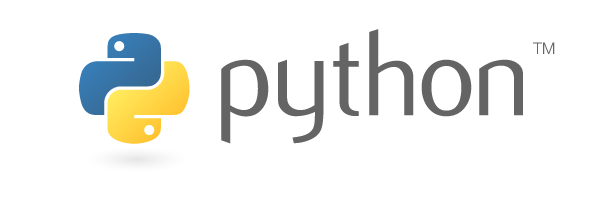

In [ ]:

image = cv2.imread("logo.png")
cv2_imshow(image)

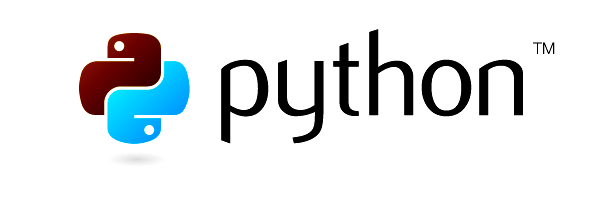

In [ ]:
pil_image = Image.open('logo.png')
contrast_enhancer = ImageEnhance.Contrast(pil_image)
pil_enhanced_image = contrast_enhancer.enhance(2)
enhanced_image = np.asarray(pil_enhanced_image)
# r = cv2.split(enhanced_image)
# enhanced_image = cv2.merge([ r])
cv2_imshow(enhanced_image)
# cv2.waitKey()

In [ ]:
type(contrast_enhancer)

PIL.ImageEnhance.Contrast

In [ ]:
X_train2.shape

(1843, 28, 28, 1)

In [ ]:
X_train2[0].shape

(28, 28, 1)

In [ ]:
ImageEnhance.Contrast(X_train2[0].shape)

AttributeError: ignored

In [ ]:
import numpy as np 

def imhist(im):
    m, n , x = im.shape
    # print(1)
    h = [0.0] * 256
    for i in range(m):
        for j in range(n):            
            h[int(im[i, j])]+=1
    return np.array(h)/(m*n)

def cumsum(h):
	# finds cumulative sum of a numpy array, list
    return [sum(h[:i+1]) for i in range(len(h))]

def histeq(im):
	#calculate Histogram
    # print("1")
    h = imhist(im)
    # print("2")
    cdf = np.array(cumsum(h)) #cumulative distribution function
    sk = np.uint8(255 * cdf) #finding transfer function values
    # print(im.shape)
    s1, s2 , s3 = im.shape
    Y = np.zeros_like(im)
    # print("3")
    # applying transfered values for each pixels
    for i in range(0, s1):
        for j in range(0, s2):
            Y[i, j] = sk[im[i, j]]
    H = imhist(Y)
    # print("4")
	#return transformed image, original and new istogram, 
	# and transform function
    return Y , h, H, sk

In [ ]:
# X_train
y =  (X_train.iloc[:,3:]).values.reshape(-1, 28, 28,1)

In [ ]:
def foo(image):
    #size = 28 28
    max = 0
    min = 255
    tmp = image.reshape(784)
    tmp = sorted(tmp)

    # print(sorted(tmp))
    # print(len(sorted(tmp)))
    max = tmp[770]
    min = tmp[50]
    # for x in range(28):
    #     for y in range(28):
    #         if max < int(image[x,y]) :
    #             max = int(image[x,y])
    #         if min > int(image[x,y]) :
    #             min = int(image[x,y])
    print(max-min,max,min);

    if  max == min :
        return
    
    for x in range(28):
        for y in range(28):
            image[x,y] = (image[x,y] - min) * 255 /(max-min)
    return image
                



In [ ]:
def gethist(image):
    hist = [0.0] * 256
    flatten_image = image.reshape(784)
    for x in flatten_image:
        # print(int(x))
        hist[int(x)] += 1

    for x in range(256):
        hist[x] = hist[x]/784
    return hist


def equalization(image):
    hist = gethist(image)
    
    cdf = [0.0] *256
    cdf[0] = hist[0]

    for x in range(1,256):
        cdf[x] = cdf[x-1]+hist[x]
    
    for x in range(28):
        for y in range(28):
            image[x,y] = limit(cdf[int(image[x,y])]*255)
    return image
def limit(x):
    if x > 255: 
        return 255
    elif x <0 :
        return 0
    return x

    

In [ ]:
def reverse(image):
    for x in range(28):
        for y in range(28):
            image[x,y] = 255-image[x,y]
    return image

In [ ]:
tmp_image = reverse(y[0])

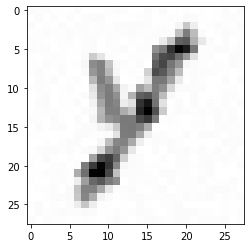

In [ ]:
plt.imshow(tmp_image.reshape(28,28),cmap='gray')

In [ ]:
print(gethist(y[0]))

[0.14668367346938777, 0.16326530612244897, 0.16454081632653061, 0.14795918367346939, 0.16198979591836735, 0.007653061224489796, 0.00510204081632653, 0.0012755102040816326, 0.00510204081632653, 0.0, 0.003826530612244898, 0.0, 0.00510204081632653, 0.0, 0.0, 0.0, 0.0012755102040816326, 0.003826530612244898, 0.002551020408163265, 0.002551020408163265, 0.0012755102040816326, 0.002551020408163265, 0.0, 0.0012755102040816326, 0.0012755102040816326, 0.003826530612244898, 0.0012755102040816326, 0.0012755102040816326, 0.0, 0.002551020408163265, 0.0, 0.002551020408163265, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012755102040816326, 0.0012755102040816326, 0.0, 0.0, 0.0, 0.0, 0.0012755102040816326, 0.0, 0.0, 0.0012755102040816326, 0.0, 0.0012755102040816326, 0.0012755102040816326, 0.0012755102040816326, 0.0, 0.0, 0.002551020408163265, 0.0, 0.0012755102040816326, 0.002551020408163265, 0.0012755102040816326, 0.0012755102040816326, 0.0012755102040816326, 0.0012755102040816326, 0.0012755102040816326,

In [ ]:
tmp_img = foo(y[0])

192 192 0


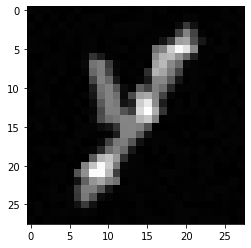

In [ ]:
plt.imshow(y[0].reshape(28,28),cmap='gray')

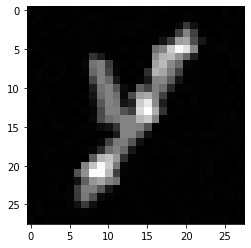

In [ ]:
plt.imshow(tmp_img.reshape(28,28),cmap="gray")

In [ ]:
tmp_img[0,0]

array([4])

TypeError: ignored

In [ ]:

for x in range(28):
    for t in range(28):
        if y[0,x,t] != tmp_img[x,t]:
            print(x,t,y[0,x,t],tmp_img[x,t],-y[0,x,t]+tmp_img[x,t])

3 20 [128] [129] [1]
4 19 [155] [156] [1]
4 20 [163] [164] [1]
5 16 [111] [112] [1]
5 17 [130] [131] [1]
5 18 [201] [203] [2]
5 19 [246] [248] [2]
5 20 [225] [227] [2]
5 21 [134] [135] [1]
6 16 [139] [140] [1]
6 17 [177] [179] [2]
6 18 [184] [186] [2]
6 19 [145] [146] [1]
6 20 [102] [103] [1]
7 8 [114] [115] [1]
7 9 [125] [126] [1]
7 16 [160] [161] [1]
7 17 [183] [185] [2]
7 18 [135] [136] [1]
7 19 [104] [105] [1]
8 8 [103] [104] [1]
8 9 [125] [126] [1]
8 16 [177] [179] [2]
8 17 [163] [164] [1]
8 18 [123] [124] [1]
9 9 [128] [129] [1]
9 10 [105] [106] [1]
9 16 [131] [132] [1]
9 17 [133] [134] [1]
9 18 [90] [91] [1]
10 9 [114] [115] [1]
10 10 [128] [129] [1]
10 11 [85] [86] [1]
10 14 [93] [94] [1]
10 16 [127] [128] [1]
10 17 [110] [111] [1]
11 9 [108] [109] [1]
11 10 [130] [131] [1]
11 11 [110] [111] [1]
11 14 [157] [158] [1]
11 15 [167] [168] [1]
11 16 [131] [132] [1]
12 9 [88] [89] [1]
12 10 [129] [130] [1]
12 11 [121] [122] [1]
12 14 [201] [203] [2]
12 15 [231] [233] [2]
12 16 [137] 

In [ ]:
new_img[0,0]

array([2])

In [ ]:
y[0]

In [ ]:
max = 1

In [ ]:
print(max)

1


In [ ]:
(현재값 -최소값)*255 / (최대값-최소값))

In [ ]:
new_img, h, new_h, sk = histeq(y[0])

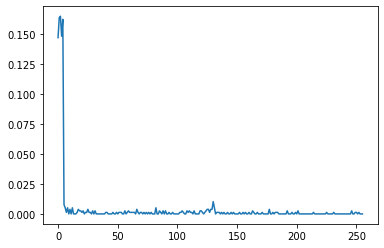

In [ ]:
plt.plot(h)

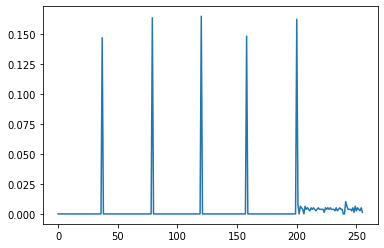

In [ ]:
plt.plot(new_h)

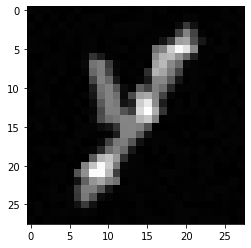

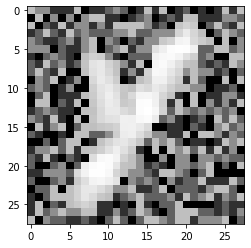

In [ ]:
plt.imshow(new_img.reshape(28,28),cmap='gray')

In [ ]:
new_img.shape

(28, 28, 1)

In [ ]:
y[0,0,0]+1

array([5])

KeyError: ignored

In [ ]:
h